In [1]:
from fastai.vision.all import *
import numpy as np

In [2]:
path = untar_data(URLs.MNIST)

In [13]:
mnist = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
    get_y=parent_label,
    item_tfms=[ToTensor],
    batch_tfms=[*aug_transforms(max_rotate=15, max_zoom=1.1, max_lighting=0.2, size=28, min_scale=0.8), 
                IntToFloatTensor(div=255.0), 
                Normalize.from_stats(*imagenet_stats)]
)

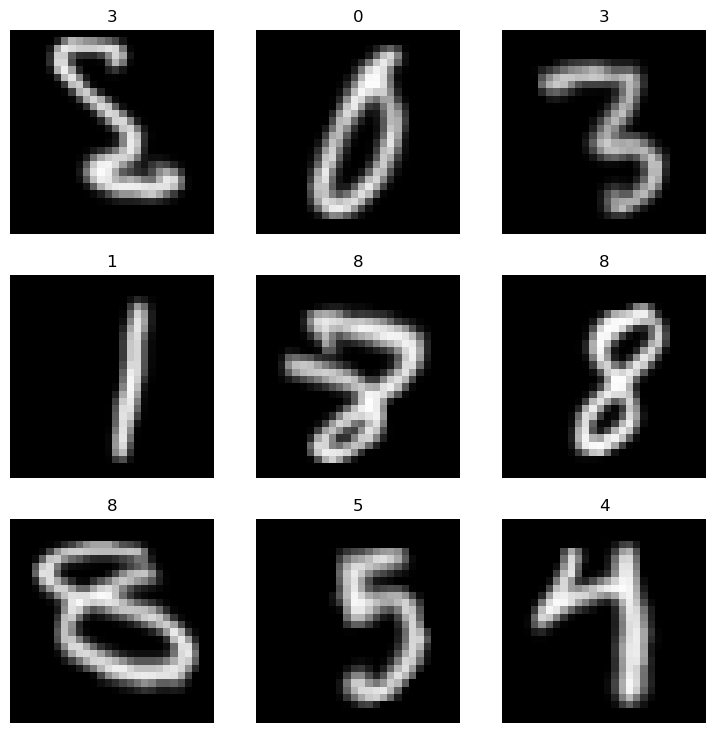

In [14]:
dls= mnist.dataloaders(path, bs=64)

dls.show_batch(max_n=9)

In [15]:
learn= vision_learner(
    dls,
    resnet18,
    pretrained=False,
    metrics=accuracy
)

SuggestedLRs(valley=0.0010000000474974513)

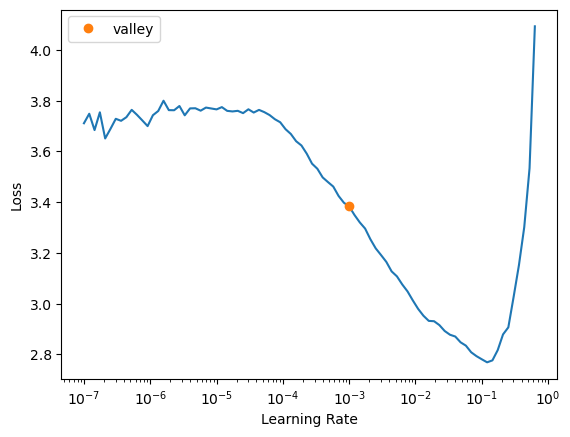

In [16]:
learn.lr_find()

In [17]:
learn.fine_tune(5, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,1.542678,1.186904,0.598700,02:14


epoch,train_loss,valid_loss,accuracy,time
0,0.770589,0.584148,0.807600,01:41
1,0.460670,0.446415,0.850600,01:38
2,0.319406,0.278077,0.907400,01:41
3,0.276382,0.246751,0.919100,01:38
4,0.260324,0.255388,0.915000,01:38
